In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 500

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

# Кластеризация

Наша задача - предсказать есть диабет у индивида или нет. В качестве таргета - колонка Diabetes. В нем три различных значения: `0`, `1`, `2`. `0` означает, что наблюдаемой здоров, `1` значит, что есть риск диабета, `2` означает наличие диабета. В качестве признаков будем использовать пол, количество лет в США, доход семьи и некоторые показатели, измеренные медицинскими работниками.  

**Задание 1.** В этой части ДЗ попробуем использовать кластеризацию как инструмент при проведении моделирования в задаче классификации

In [2]:
df = pd.read_csv('datahw21.csv', index_col='Unnamed: 0')

df.head()

,Gender,Years_in_US,Family_income,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed,Diabetes
0,1,0.0,0.84,35.3,20.6,55.2,2.0,2.0
1,1,0.0,1.78,34.7,24.4,61.5,2.0,2.0
2,1,0.0,4.51,33.5,25.6,91.0,2.0,2.0
3,1,0.0,2.52,21.0,14.9,32.2,2.0,0.0
4,2,0.0,5.00,25.2,20.7,30.9,2.0,0.0


<Axes: >

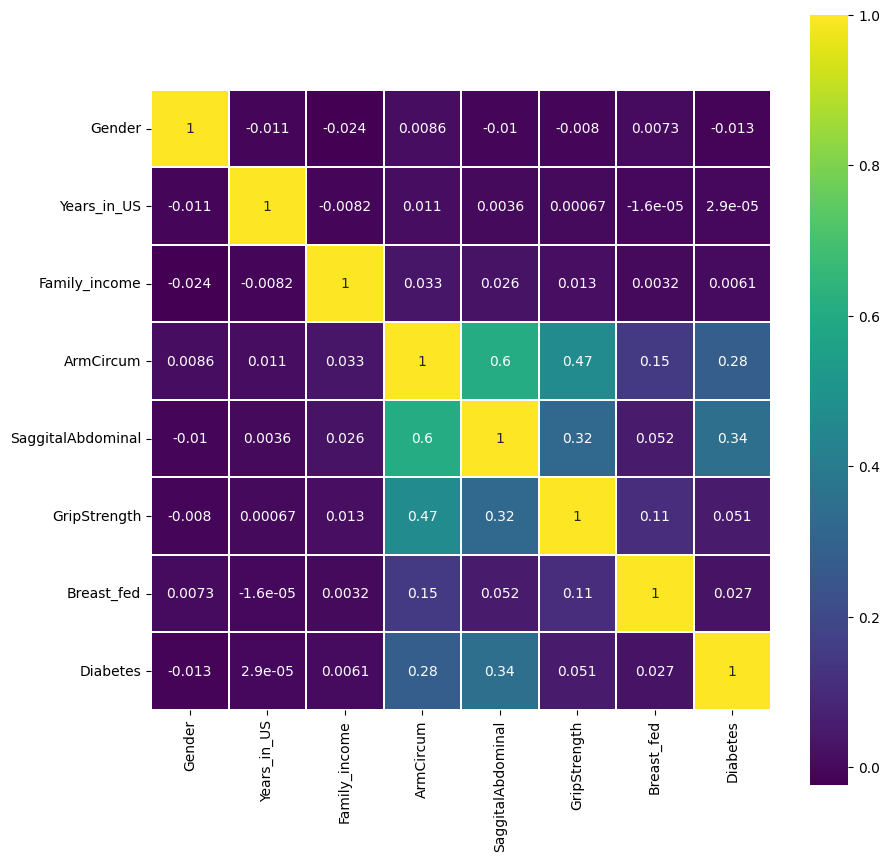

In [3]:
### Посмотрим как устроены данные
### Изобразим корреляционную матрицу

colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)

In [5]:
### Разделим выборку на трейн-тест

data = df.drop(['Diabetes'], axis=1)
target = df[['Diabetes']]

X_train, X_test, y_train, y_test = train_test_split(data,
                                                    target, 
                                                    test_size=0.25,
                                                    random_state=1)

Для того, чтобы использовать K-means, лучше будет отнормировать данные. 

In [8]:
### Воспользуемся StandardScaler

### Your code is here
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

,Gender,Years_in_US,Family_income,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed
0,-1.017409,-0.198311,-0.311557,0.380926,-0.823248,0.282705,0.388951
1,0.982889,-0.198311,0.037744,0.057088,-0.306067,-1.259208,0.388951
2,-1.017409,-0.198311,-0.599577,-0.538774,-0.964298,-0.280860,0.388951
3,0.982889,-0.198311,-0.446375,0.419786,-0.705707,-0.226757,0.388951
4,0.982889,-0.198311,1.686197,0.251391,-0.165018,-0.366521,0.388951
...,...,...,...,...,...,...,...
7354,-1.017409,-0.198311,0.423813,0.095948,-0.799740,-0.483743,0.388951
7355,0.982889,-0.198311,-1.169488,-0.318564,-1.293413,-0.736220,0.388951
7356,0.982889,-0.198311,0.932443,0.406833,-0.635182,0.652404,0.388951
7357,-1.017409,-0.198311,-0.856956,-1.341892,-0.070985,-0.100519,-2.571018


Обучим K-Means с параметрами `n_clusters` = 3, `tol` = 0.0005. Выбор параметров обусловлен тем, что у нас три возможных значения таргета. Но в целом основной подход подбора количества кластеров - по кривой зависимости внутрикластерного и межкластерного расстояний от количества кластеров.

Установите `random_state` = 1

In [32]:
kmeans = KMeans(n_clusters=3, tol=0.0005, random_state=1)
kmeans.fit(X_train_scaled)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0005
,verbose,0
,random_state,1
,copy_x,True
,algorithm,'lloyd'


In [33]:
train_clusters = kmeans.predict(X_train_scaled)
test_clusters = kmeans.predict(X_test_scaled)

Посчитаем качество на изначальных данных(нормированных). Для этого обучите с дефолтными параметрами `RandomForestClassifier`, `LogisticRegression`, `LinearSVC`. Там, где нужно, установите `random_state` = 1. (1б)

In [51]:
### Your code is here
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score

rf_model = RandomForestClassifier(random_state=1)
lr_model = LogisticRegression(random_state=1)
svc_model = LinearSVC(random_state=1)

print("Обучение RandomForestClassifier...")
rf_model.fit(X_train_scaled, y_train)

print("Обучение LogisticRegression...")
lr_model.fit(X_train_scaled, y_train)

print("Обучение LinearSVC...")
svc_model.fit(X_train_scaled, y_train)

rf_pred = rf_model.predict(X_test_scaled)
lr_pred = lr_model.predict(X_test_scaled)
svc_pred = svc_model.predict(X_test_scaled)

Обучение RandomForestClassifier...
Обучение LogisticRegression...
Обучение LinearSVC...


In [52]:
print(f"Accurcy для RandomForestClassifier: {accuracy_score(y_test, rf_pred)}")
print(f"Accurcy для LogisticRegression: {accuracy_score(y_test, lr_pred)}")
print(f"Accurcy для LinearSVC: {accuracy_score(y_test, svc_pred)}")

Accurcy для RandomForestClassifier: 0.8879380603096985
Accurcy для LogisticRegression: 0.8875305623471883
Accurcy для LinearSVC: 0.8920130399348003


Добавьте в признаковое описание номер кластера и посчитайте качество с новым признаком! Стало ли качество хоть сколько-то лучше? (1б)

In [53]:
### Your code is here
X_train_with_clusters = np.column_stack([X_train_scaled, train_clusters])
X_test_with_clusters = np.column_stack([X_test_scaled, test_clusters])
pd.DataFrame(X_train_with_clusters).head()

,0,1,2,3,4,5,6,7
0,-1.017409,-0.198311,-0.311557,0.380926,-0.823248,0.282705,0.388951,0.0
1,0.982889,-0.198311,0.037744,0.057088,-0.306067,-1.259208,0.388951,1.0
2,-1.017409,-0.198311,-0.599577,-0.538774,-0.964298,-0.280860,0.388951,0.0
3,0.982889,-0.198311,-0.446375,0.419786,-0.705707,-0.226757,0.388951,1.0
4,0.982889,-0.198311,1.686197,0.251391,-0.165018,-0.366521,0.388951,1.0


In [54]:
rf_model = RandomForestClassifier(random_state=1)
lr_model = LogisticRegression(random_state=1)
svc_model = LinearSVC(random_state=1)

print("Обучение RandomForestClassifier...")
rf_model.fit(X_train_with_clusters, y_train)

print("Обучение LogisticRegression...")
lr_model.fit(X_train_with_clusters, y_train)

print("Обучение LinearSVC...")
svc_model.fit(X_train_with_clusters, y_train)

rf_pred = rf_model.predict(X_test_with_clusters)
lr_pred = lr_model.predict(X_test_with_clusters)
svc_pred = svc_model.predict(X_test_with_clusters)

print(f"Accurcy для RandomForestClassifier с новым признаком: {accuracy_score(y_test, rf_pred)}")
print(f"Accurcy для LogisticRegression с новым признаком: {accuracy_score(y_test, lr_pred)}")
print(f"Accurcy для LinearSVC с новым признаком: {accuracy_score(y_test, svc_pred)}")

Обучение RandomForestClassifier...
Обучение LogisticRegression...
Обучение LinearSVC...
Accurcy для RandomForestClassifier с новым признаком: 0.8883455582722086
Accurcy для LogisticRegression с новым признаком: 0.8875305623471883
Accurcy для LinearSVC с новым признаком: 0.8928280358598207


Посчитаем расстояния от объектов до центров кластеров. Для этого воспользуемся методом `transform` обученного класса kmeans.

Обучим и посчитаем метрики исключительно на расстояниях до центра. Убедимся, что такой подход имеет право на существование, если данные позволяют, то качество не сильно должно пострадать. А в каких-то случаях может оказаться даже лучше! Таким образом можно снижать размерность данных. (2б)

In [55]:
### Your code is here

# Получаем расстояния от каждого объекта до всех центроидов
X_train_distances = kmeans.transform(X_train_scaled)
X_test_distances = kmeans.transform(X_test_scaled)
X_train_distances

array([[1.27454299, 2.3985639 , 2.33028843],
       [2.33391276, 1.16019836, 2.79986568],
       [1.00614185, 2.1997746 , 3.03621069],
       ...,
       [2.60842632, 1.81339136, 2.1890043 ],
       [2.80464584, 3.41412372, 4.20768868],
       [4.64629664, 4.31176439, 2.97529387]])

In [56]:
distance_columns = [f'distance_to_center_{i}' for i in range(3)]
X_train_distances_df = pd.DataFrame(X_train_distances, 
                                   columns=distance_columns, 
                                   index=X_train.index)
X_test_distances_df = pd.DataFrame(X_test_distances, 
                                  columns=distance_columns, 
                                  index=X_test.index)

print("\nРасстояния до центроидов:")
print(X_train_distances_df.head())


Расстояния до центроидов:
      distance_to_center_0  distance_to_center_1  distance_to_center_2
388               1.274543              2.398564              2.330288
4053              2.333913              1.160198              2.799866
4286              1.006142              2.199775              3.036211
925               2.317612              1.175140              2.335223
4982              2.748623              2.004563              2.649139


In [57]:
rf_distances = RandomForestClassifier(random_state=1)
rf_distances.fit(X_train_distances_df, y_train)
rf_pred_dist = rf_distances.predict(X_test_distances_df)

lr_distances = LogisticRegression(random_state=1)
lr_distances.fit(X_train_distances_df, y_train)
lr_pred_dist = lr_distances.predict(X_test_distances_df)

svc_distances = LinearSVC(random_state=1, max_iter=10000)
svc_distances.fit(X_train_distances_df, y_train)
svc_pred_dist = svc_distances.predict(X_test_distances_df)


print(f"Accurcy для RandomForestClassifier с расстояниями до кластеров: {accuracy_score(y_test, rf_pred_dist)}")
print(f"Accurcy для LogisticRegression с расстояниями до кластеров: {accuracy_score(y_test, lr_pred_dist)}")
print(f"Accurcy для LinearSVC с расстояниями до кластеров: {accuracy_score(y_test, svc_pred_dist)}")

Accurcy для RandomForestClassifier с расстояниями до кластеров: 0.882640586797066
Accurcy для LogisticRegression с расстояниями до кластеров: 0.8920130399348003
Accurcy для LinearSVC с расстояниями до кластеров: 0.8920130399348003
